<a href="https://colab.research.google.com/github/prai96/Kaggle_Dataset/blob/main/Kaggle(GOOGLE_STOCK_PRICE_RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing dataset

train_data = pd.read_csv("/content/trainset.csv")
test_data = pd.read_csv("/content/testset.csv")

In [4]:
train_data.shape

(1259, 7)

In [5]:
test_data.shape

(125, 7)

In [6]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [9]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [7]:
training_set = train_data.iloc[:, 1:2].values

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
# Creating a data structure with 70 timesteps and 1 output
X_train = []
y_train = []
for i in range(70, 1258):
    X_train.append(training_set_scaled[i-70:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
from keras import models
#Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 69ms/step - loss: 0.0316
Epoch 2/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0048
Epoch 3/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0040
Epoch 4/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0038
Epoch 5/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0034
Epoch 7/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0037
Epoch 8/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0037
Epoch 9/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0034
Epoch 10/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0030
Epoch 12/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0033
Epoch 13/100
38/38 [====

In [22]:
#Testing Data set 0f 2018
real_stock_price = test_data["Open"]

In [23]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 70:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(70, 194):
    X_test.append(inputs[i-70:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred = model.predict(X_test)
pred = sc.inverse_transform(pred)

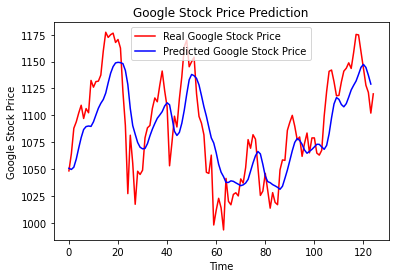

In [25]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [26]:
pred

array([[1050.7354],
       [1049.6786],
       [1051.7831],
       [1059.3826],
       [1069.6412],
       [1079.3176],
       [1086.8379],
       [1089.5667],
       [1090.0845],
       [1089.7344],
       [1093.9698],
       [1100.3527],
       [1106.6187],
       [1111.2196],
       [1114.7654],
       [1120.7518],
       [1130.3315],
       [1139.2521],
       [1145.3671],
       [1148.7972],
       [1149.3411],
       [1149.0482],
       [1148.1367],
       [1141.7621],
       [1128.7369],
       [1106.3906],
       [1090.4498],
       [1082.4459],
       [1074.7554],
       [1070.3254],
       [1068.866 ],
       [1069.1741],
       [1073.6893],
       [1080.9047],
       [1087.1666],
       [1092.4493],
       [1097.2792],
       [1100.277 ],
       [1103.4711],
       [1108.6732],
       [1111.6798],
       [1109.8381],
       [1097.8586],
       [1085.1676],
       [1081.3019],
       [1084.1637],
       [1092.6863],
       [1104.8994],
       [1119.7544],
       [1133.1182],
